<a href="https://colab.research.google.com/github/theaayushraman/INTRODUCTORY-OPTIONS/blob/main/black_scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss
from scipy.stats import norm

**IMPORTING DATA**

In [14]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0


In [15]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [16]:
dfo.options  #to get the date of different expiration time

('2024-01-03',
 '2024-01-04',
 '2024-01-05',
 '2024-01-08',
 '2024-01-09',
 '2024-01-10',
 '2024-01-11',
 '2024-01-12',
 '2024-01-16',
 '2024-01-17',
 '2024-01-18',
 '2024-01-19',
 '2024-01-22',
 '2024-01-23',
 '2024-01-24',
 '2024-01-25',
 '2024-01-26',
 '2024-01-29',
 '2024-01-30',
 '2024-01-31',
 '2024-02-01',
 '2024-02-02',
 '2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-09',
 '2024-02-12',
 '2024-02-16',
 '2024-02-29',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [17]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [18]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240104C01200000,2023-12-18 20:07:18+00:00,1200.0,3548.84,3540.7,3547.6,0.0,0.0,26.0,0,6.913087,True,REGULAR,USD
1,SPXW240104C01400000,2023-12-21 15:06:55+00:00,1400.0,3328.95,3340.7,3347.7,0.0,0.0,NaN,0,6.184573,True,REGULAR,USD
2,SPXW240104C02200000,2023-12-20 15:27:05+00:00,2200.0,2576.63,2540.9,2547.8,0.0,0.0,NaN,0,4.031743,True,REGULAR,USD
3,SPXW240104C02400000,2023-12-21 15:06:55+00:00,2400.0,2331.20,2341.0,2347.9,0.0,0.0,NaN,0,3.630372,True,REGULAR,USD
4,SPXW240104C03200000,2023-12-20 15:27:05+00:00,3200.0,1579.13,1541.1,1548.0,0.0,0.0,NaN,0,2.212651,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [19]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
        """
    # Calculate log returns
    log_return = np.log(df['Close'].pct_change())

   # Remove NaN values (if any)
    log_return = log_return.dropna()

   # Calculate daily volatility
    daily_vol = log_return.std()

   # Annualize daily volatility
    vol = daily_vol * np.sqrt(252)  # 252 trading days in a year

    return vol

In [20]:
vol = annual_vol(df)
vol

18.786473377806477

# **BLACK-SCHOLES MODEL**


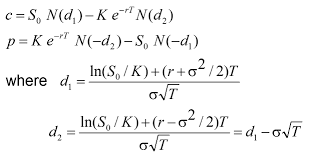

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [21]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """

    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option == 'call':
        premium = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option == 'put':
        premium = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError(" Please choose 'call' or 'put'.")

    return premium

   #your code here

In [22]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [23]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
1200.0,4379.833535
1400.0,4344.327184
2200.0,4224.648135
2400.0,4198.811649
3200.0,4106.660695


In [24]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
1200.0,3548.84
1400.0,3328.95
2200.0,2576.63
2400.0,2331.20
3200.0,1579.13


In [25]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
1200.0,4379.833535,3548.84
1400.0,4344.327184,3328.95
2200.0,4224.648135,2576.63
2400.0,4198.811649,2331.20
3200.0,4106.660695,1579.13
3400.0,4085.898996,1342.97
3500.0,4075.804566,1279.71
3700.0,4056.149525,930.00
3850.0,4041.847799,732.13
3900.0,4037.159983,684.06


<Axes: >

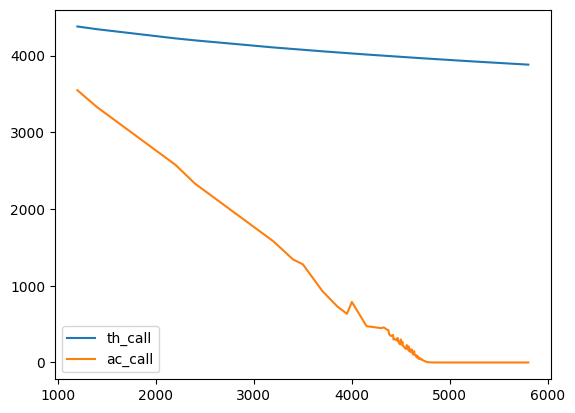

In [26]:
call.plot() #plotting the actual and theoretical call prices

In [27]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2200.0,1681.817895
2400.0,1855.981394
2800.0,2207.902341
3000.0,2385.414760
3200.0,2563.830380


In [28]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2200.0,0.05
2400.0,0.05
2800.0,0.05
3000.0,0.05
3200.0,0.05


In [29]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
4940.0,4144.602368,154.67
4950.0,4153.803220,155.89
4975.0,4176.810062,184.06
5000.0,4199.823593,254.17
5025.0,4222.843763,226.94
5100.0,4291.943613,513.41
5200.0,4384.166742,599.92
5400.0,4568.910540,811.09
5600.0,4754.032720,997.07
5800.0,4939.512934,1172.43


<Axes: >

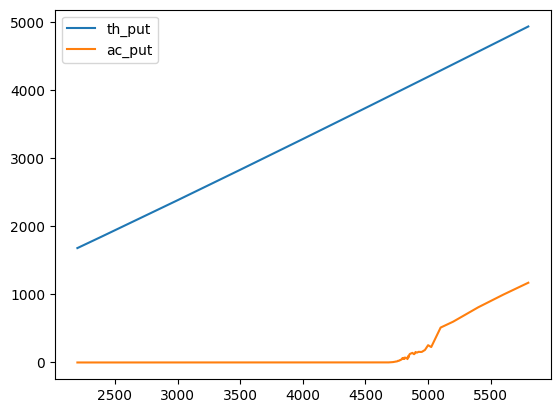

In [30]:
put.plot()